# Loading data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import os


# load the dataframe
df = fetch_california_housing(
    data_home = "data/", # the folder where the dataset will be saved when download
    as_frame=True, # make sure that the dataset is loaded as a dataframe
    download_if_missing=True # download if the dataset is not in the data folder
).frame # this is for taking the dâtframe format

df.head() # display the first 5 rows of the dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Visualize and Analyse the data

In [2]:
# display dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
# total of NaN in each column
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
# display some important infomation 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

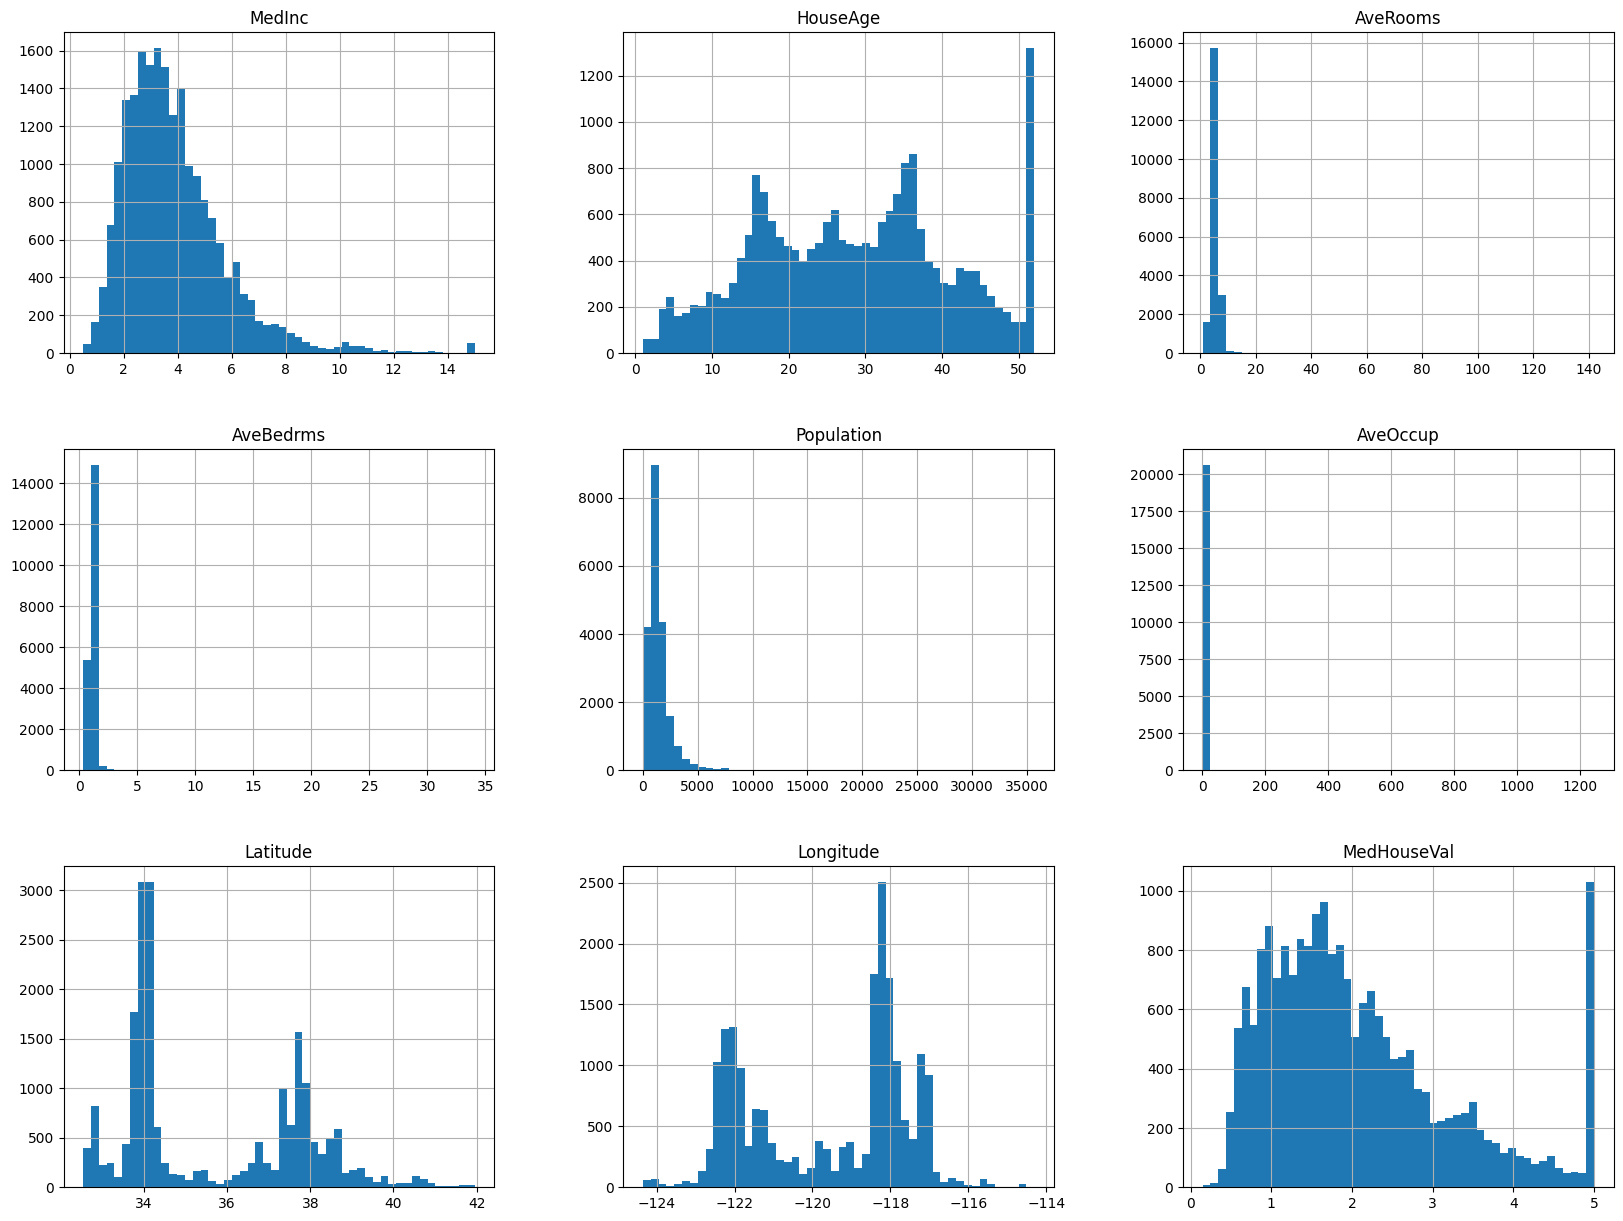

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


# plot historgram of the columns
df.hist(bins=50, figsize=(20, 15))

In [6]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

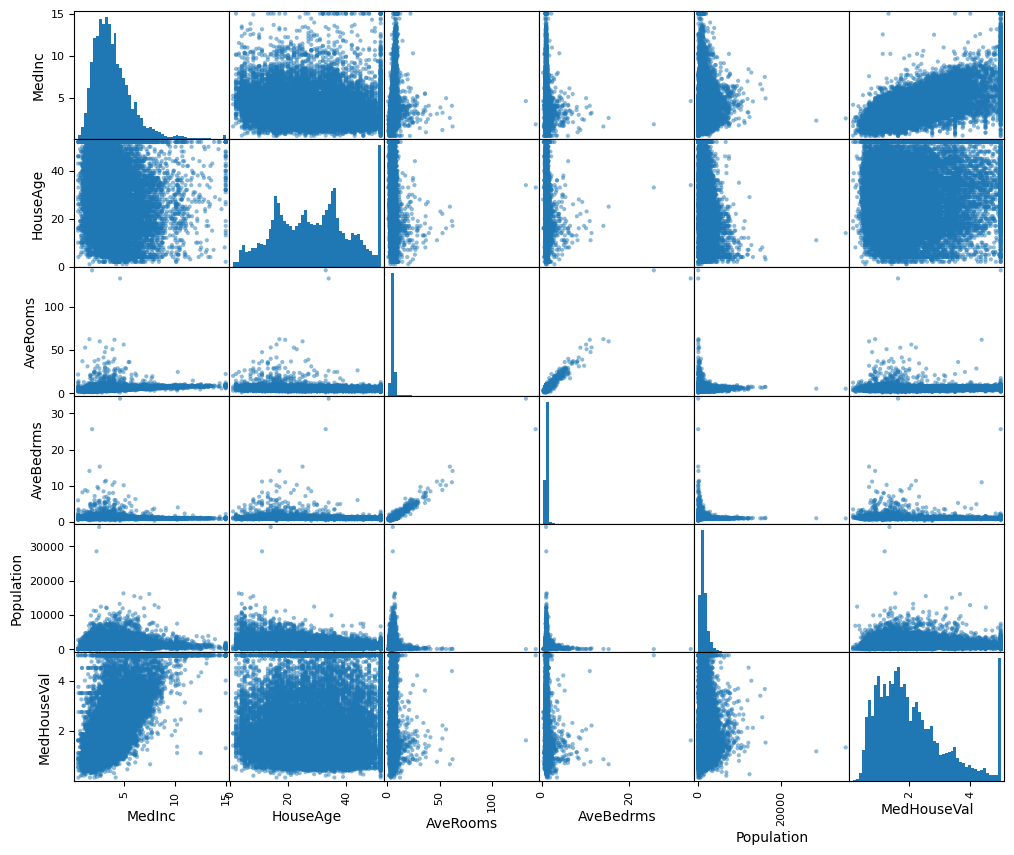

In [7]:
from pandas.plotting import scatter_matrix


scatter_matrix(df[['MedInc', 'HouseAge', "AveRooms", "AveBedrms", "Population", "MedHouseVal"]], 
               figsize=(12,10), 
               hist_kwds={'bins': 50});

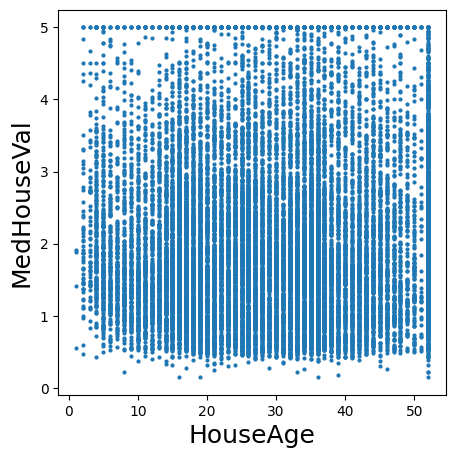

In [8]:
x_label = "HouseAge"
y_label = "MedHouseVal"
plt.figure(figsize=(5, 5))
plt.scatter(df[x_label], df[y_label], s=4)
plt.xlabel(x_label, fontsize=18)
plt.ylabel(y_label, fontsize=18);

# Prepare data and training

In [9]:
from sklearn.model_selection import train_test_split


# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), #X
                                                    df['MedHouseVal'], #y
                                                    test_size=.3, # percent for testing
                                                    random_state=42 # make sure the randomness is the same runtime
                                                   )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14448, 8), (14448,), (6192, 8), (6192,))

# Using Linear Regression

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Setup necessary steps for the pipeline
steps = [
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
]

# Create the pipeline
pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [11]:
# train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [12]:
# evaluate using r2 score
pipeline.score(X_test, y_test)

0.5957702326061665

# Using RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor


steps = [
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(max_depth=10, random_state=42))
]

pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [15]:
pipeline.score(X_test, y_test)

0.7756024453804194

# Using GradientBoostingRegressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor


params = {
    "n_estimators": 500, # 500 trees
    "max_depth": 10, # tree's depth = 10
    "min_samples_split": 5, 
    "learning_rate": 0.01,
    "loss": "squared_error", # absolute_error
}

steps = [
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor(**params))
]

pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                                           min_samples_split=5,
                                           n_estimators=500))])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                                           min_samples_split=5,
                                           n_estimators=500))])

In [18]:
pipeline.score(X_test, y_test)

0.8266130469629731

# Evaluate

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#predict on test set
y_pred = pipeline.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(r2)
print(mae)

0.22757733003273653
0.8266130469629731
0.3109361889320708


# Example predictions

In [20]:
X_test.shape, y_test.shape, y_pred.shape

((6192, 8), (6192,), (6192,))

In [21]:
num_sample = 10

In [22]:
X_test[0:num_sample]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
13311,4.7147,12.0,5.251483,0.975089,2400.0,2.846975,34.08,-117.61
7113,5.0839,36.0,6.221719,1.095023,670.0,3.031674,33.89,-118.02
7668,3.6908,38.0,4.962825,1.048327,1011.0,3.758364,33.92,-118.08
18246,4.8036,4.0,3.924658,1.035959,1050.0,1.797945,37.39,-122.08
5723,8.1132,45.0,6.879056,1.011799,943.0,2.781711,34.18,-118.23


In [23]:
y_test[0:num_sample].to_frame()

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
13311,1.58700
7113,1.98200
7668,1.57500
18246,3.40000
5723,4.46600


In [24]:
new_pred = pipeline.predict(X_test[0:num_sample])

In [25]:
show_df = X_test[0:num_sample]
show_df["MedHouseVal"] = y_test[0:num_sample]
show_df["PredictedMedHouseVal"] = new_pred

show_df

C:\Users\Admins\AppData\Local\Temp\ipykernel_13104\917649185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_df["MedHouseVal"] = y_test[0:num_sample]
C:\Users\Admins\AppData\Local\Temp\ipykernel_13104\917649185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_df["PredictedMedHouseVal"] = new_pred


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PredictedMedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.515407
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,0.764685
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,4.929265
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.385514
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.436010
13311,4.7147,12.0,5.251483,0.975089,2400.0,2.846975,34.08,-117.61,1.58700,1.689689
7113,5.0839,36.0,6.221719,1.095023,670.0,3.031674,33.89,-118.02,1.98200,2.436496
7668,3.6908,38.0,4.962825,1.048327,1011.0,3.758364,33.92,-118.08,1.57500,1.599435
18246,4.8036,4.0,3.924658,1.035959,1050.0,1.797945,37.39,-122.08,3.40000,2.735253
5723,8.1132,45.0,6.879056,1.011799,943.0,2.781711,34.18,-118.23,4.46600,4.786326
